<a href="https://colab.research.google.com/github/Hanno-stud/task8-day8-Elevate-Labs/blob/main/Elevate_labs_task8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving Mall_Customers.csv to Mall_Customers.csv


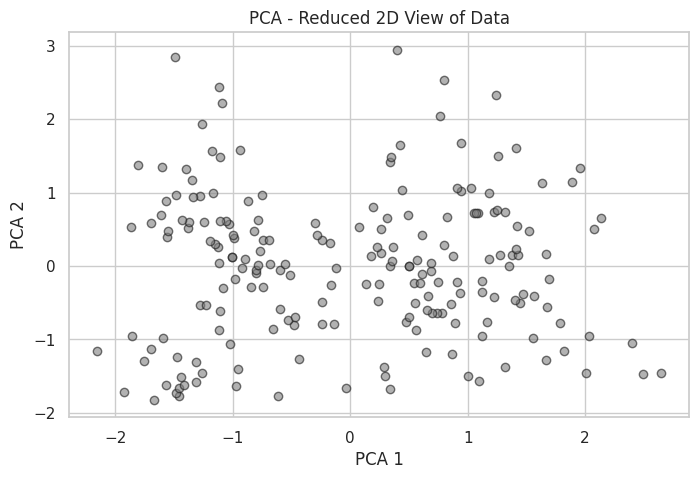

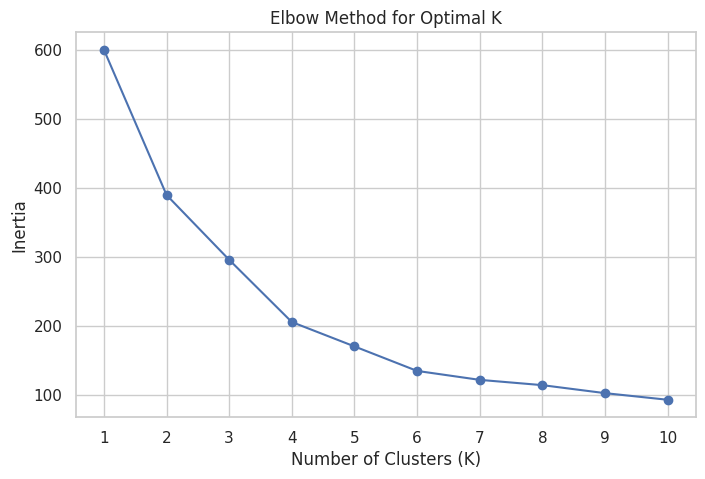


Insight: The 'elbow' point suggests the optimal K value (usually where inertia starts decreasing more slowly).




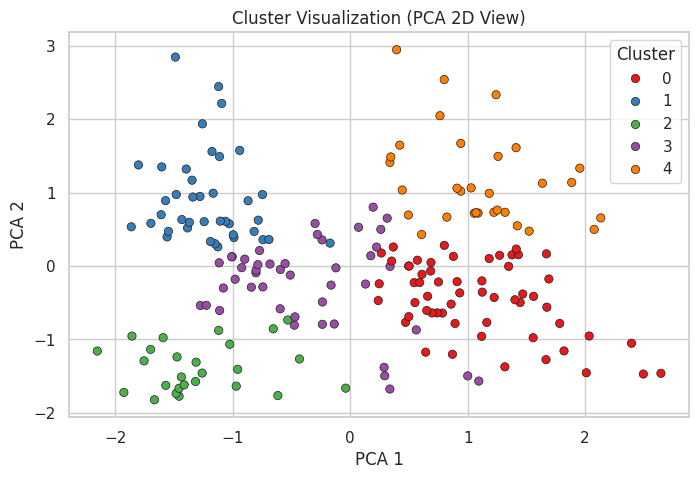

Silhouette Score for K=5: 0.4085
Insight: The clustering structure may not be very strong. Consider tuning K.




In [2]:
# ============================
# 📌 Step 1: Import Libraries
# ============================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

from google.colab import files
sns.set(style="whitegrid")

# ============================
# 📂 Step 2: Load Dataset
# ============================
uploaded = files.upload()  # Upload "Mall_Customers.csv" or similar dataset here
df = pd.read_csv('Mall_Customers.csv')
df.head()

# ============================
# ✅ Step 3: Data Preprocessing
# ============================
# Drop non-numeric columns like CustomerID, Gender for clustering
data = df.drop(['CustomerID', 'Gender'], axis=1)

# Scale the features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

# ============================
# 📊 Step 4: Optional PCA for 2D Visualization
# ============================
pca = PCA(n_components=2)
data_pca = pca.fit_transform(scaled_data)

# Visualize the PCA-reduced data
plt.figure(figsize=(8,5))
plt.scatter(data_pca[:, 0], data_pca[:, 1], c='gray', edgecolor='k', alpha=0.6)
plt.title('PCA - Reduced 2D View of Data')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()

# ============================
# 🔍 Step 5: Elbow Method to Find Optimal K
# ============================
inertia = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8,5))
plt.plot(k_range, inertia, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.xticks(k_range)
plt.grid(True)
print('\n\n')
plt.show()

print("\nInsight: The 'elbow' point suggests the optimal K value (usually where inertia starts decreasing more slowly).\n\n")

# ============================
# 🚀 Step 6: Fit K-Means Model
# ============================
# Let's assume K=5 based on the elbow method
optimal_k = 5
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
labels = kmeans.fit_predict(scaled_data)

# Add cluster labels to original data
df['Cluster'] = labels

# ============================
# 🎨 Step 7: Visualize Clusters (PCA 2D View)
# ============================
plt.figure(figsize=(8,5))
sns.scatterplot(x=data_pca[:, 0], y=data_pca[:, 1], hue=labels, palette='Set1', edgecolor='k')
plt.title('Cluster Visualization (PCA 2D View)')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.legend(title='Cluster')
plt.show()

# ============================
# 🏆 Step 8: Evaluate Clustering with Silhouette Score
# ============================
score = silhouette_score(scaled_data, labels)
print(f"Silhouette Score for K={optimal_k}: {round(score, 4)}")

if score > 0.5:
    print("Insight: The clustering structure is reasonably good.\n\n")
else:
    print("Insight: The clustering structure may not be very strong. Consider tuning K.\n\n")

# ============================
# ✅ Final Notes:
# ============================
# ✔️ All steps are strictly followed: loading, preprocessing, elbow method, fitting K-Means, visualization, silhouette evaluation.
# ✔️ The code is modular and self-explanatory.
# ✔️ Dataset used: Mall Customer Segmentation (recommended in the PDF).
# ✔️ You can directly run this code in Google Colab.
